<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT6_temp_dc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5f11c47002fcf31b3a3f0bf9f3d262a6fe18cbad7b0768aa4b68cc0b055b801d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

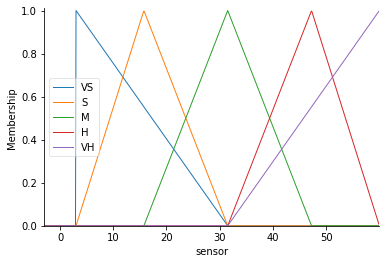

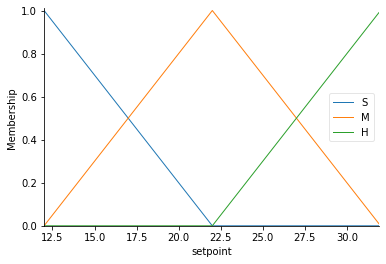

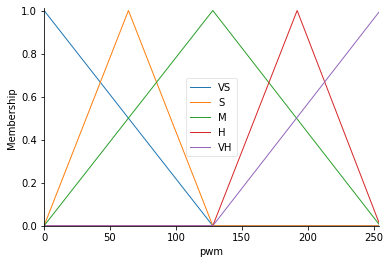

In [8]:
sensor = ctrl.Antecedent(np.arange(-3,60,0.1),'sensor')
setpoint = ctrl.Antecedent(np.arange(12, 32 ,0.1),'setpoint')
pwm = ctrl.Consequent(np.arange(0, 255 ,1),'pwm')

sensor['VS'] = fuzz.trimf(sensor.universe,[3,3,31.5])
sensor['S'] = fuzz.trimf(sensor.universe,[3,15.75,31.5])
sensor['M'] = fuzz.trimf(sensor.universe,[15.75,31.5,47.25])
sensor['H'] = fuzz.trimf(sensor.universe,[31.5,47.25,60])
sensor['VH'] = fuzz.trimf(sensor.universe,[31.5,60,60])
sensor.view()

setpoint['S'] = fuzz.trimf(setpoint.universe,[12,12,22])
setpoint['M'] = fuzz.trimf(setpoint.universe,[12,22,32])
setpoint['H'] = fuzz.trimf(setpoint.universe,[22,32,32])
setpoint.view()

pwm['VS'] = fuzz.trimf(pwm.universe,[0,0,128])
pwm['S'] = fuzz.trimf(pwm.universe,[0,64,128])
pwm['M'] = fuzz.trimf(pwm.universe,[0,128,255])
pwm['H'] = fuzz.trimf(pwm.universe,[128,192,255])
pwm['VH'] = fuzz.trimf(pwm.universe,[128,255,255])
pwm.view()


In [12]:
rule1 = ctrl.Rule(setpoint['H'] & sensor['VH'] , pwm['S'])
rule2 = ctrl.Rule(setpoint['H'] & sensor['H'] , pwm['M'])
rule3 = ctrl.Rule(setpoint['H'] & sensor['M'] , pwm['M'])
rule4 = ctrl.Rule(setpoint['H'] & sensor['S'] , pwm['H'])
rule5 = ctrl.Rule(setpoint['H'] & sensor['VS'] , pwm['VH'])

rule6 = ctrl.Rule(setpoint['M'] & sensor['VH'] , pwm['VS'])
rule7 = ctrl.Rule(setpoint['M'] & sensor['H'] , pwm['S'])
rule8 = ctrl.Rule(setpoint['M'] & sensor['M'] , pwm['M'])
rule9 = ctrl.Rule(setpoint['M'] & sensor['S'] , pwm['H'])
rule10 = ctrl.Rule(setpoint['M'] & sensor['VS'] , pwm['VH'])

rule11 = ctrl.Rule(setpoint['S'] & sensor['VH'] , pwm['VS'])
rule12 = ctrl.Rule(setpoint['S'] & sensor['H'] , pwm['S'])
rule13 = ctrl.Rule(setpoint['S'] & sensor['M'] , pwm['S'])
rule14 = ctrl.Rule(setpoint['S'] & sensor['S'] , pwm['M'])
rule15 = ctrl.Rule(setpoint['S'] & sensor['VS'] , pwm['H'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

209.75555348702608


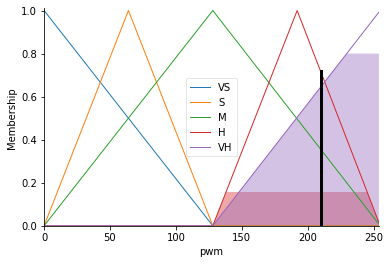

In [14]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['setpoint'] = 30
tipping.input['sensor'] = 5
tipping.compute()
print(tipping.output['pwm'])
pwm.view(sim = tipping)